
    
    
## <H2 align="center"> <font color='white'> **MAF1731B**: Microstructure and Trading Systems </H2>

### <H3 align="center"> <font color='white'> **Project: EUR/USD** Behavior during Initial Jobless Claims statements </H3>

 <H5 align="center"> <em> Professor: Villalobos Ramos Omar Antonio <em>

 <p align="center"> <img style=" margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="350" height="150" /> 

 <strong> <H5 align="left"> Student:
Esteban Márquez Delgado <strong>

 *Registry*:
if700637: https://github.com/EstebanMqz/MyST_Project

 <center> <font color= #555555> <font size = 4> November 2022 </a> <font color= #555555> <font size = 4> </a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Project </font> <br> <br> <font color= #555555> <font size = 5> 
Project 1: Fundamental Analysis </font>

<hr style="border:0.02in solid gray"> </hr>

### <font color= #555555> <font size = 4> Abstract </font>

This document was prepared as Final Project for Microstructure and Trading Systems - MAF1731B class during the Autumn 2022 course at ITESO for the Bachelor of Financial Engineering. 

It has the following sections:

1. *Financial Aspects*.

2. *Statistic Aspects*.

3. *Computational Aspects*.

4. *Optimización y Backtest*.



<font color= lightblue> <font size = 4> 0. Libraries and Dependencies: </font>

<font color= gray>

**Note**: To run this notebook it is necessary to have the following libraries contained in the [requirements.txt](https://github.com/EstebanMqz/MyST_LAB_4/blob/main/requirements.txt) script of this project.

To install the libraries in the script run the following cell:

In [4]:
!pip install -r requirements.txt

ERROR: Invalid requirement: '"""' (from line 1 of requirements.txt)


If you prefer, manual installation can be done with the individual installation of the following libraries:

<font color= lightblue> <font size = 1> 
+ pandas >= 1.3.4
+ pandas_datareader >= 0.10.0
+ numpy >= 1.19.1
+ jupyter >= 1.0.0
+ chart_studio >= 1.1
+ plotly >= 5.60
+ scipy >= 1.7.3
+ regex >= 2022.3.15
+ time >= 3.11 
+ datetime >= 4.7
+ MetaTrader5 >= 5.0.43
+ pytz >= 2021.3
+ fire >= 0.4.0
+ kaleido >= 0.2.1
+ Pillow >= 9.3
+ statsmodels >= 0.13.5
+ scipy >= 1.9.3
+ scikit-learn >= 1.0.2

### <font color= white> <font size = 4> 0.1 Introduction: </font>

<font color= lightblue> <font size = 3> Description: </font>

<font color= lightgray>
Jobless claims reports are provided on a weekly basis each Thursday at 8.30 am ET by the Labour Department Employment and Training Administration and it measures Unemployment Insurance (UI) benefits in the form of weekly payments to eligible workers. 


The following are the categories for jobless claims:
1. **Initial Jobless Claims:** The report is a measure that declares how many citizens filed for state unemployment insurance for the *first time* in the previous week.

2. **Continuing Jobless Claims:** It is a measure that states the number of individuals who are already receveing unemployment benefits and they *re-applied* for them in the previous week.

It provides Actual, Previous and Consensus estimates in *(thousands)* and it is an important indicator because there's an inverse relationship between jobless claims results and employment:

+ As claims decrease, higher consumption and stronger economic growth follows.
+ As claims rise, employment numbers fall, consumption decreases and economic growth declines.

<font color= lightblue> <font size = 3> Readings: </font>
<font color= lightgray>

There are two types of readings for reports:

+ **Beat**: Lower claims numbers than the market Consensus, *better than expected*.
+ **Miss**: Higher claims numbers than the market Consensus, *worse than expected*.




##### *General help:*
In order, to retrieve specific help from the scripts tree in the project execute the help function on the script or in specific modules from the following:
+ [data.py](https://github.com/EstebanMqz/MyST_Project/blob/main/data.py)
+ [functions.py](https://github.com/EstebanMqz/MyST_Project/blob/main/functions.py)
+ [visualizations.py](https://github.com/EstebanMqz/MyST_Project/blob/main/visualizations.py)

In [1]:
## Libraries
import warnings
import pandas as pd # Analysis and data management
import pandas_datareader as pdr
import pandas_datareader.data as web #Data extraction from the web
import numpy as np
from datetime import datetime, timedelta, date
import datetime

#Plotly
import plotly.graph_objects as go 
import plotly.express as px
from plotly.subplots import make_subplots 
from scipy.optimize import minimize # Optimization 
from collections import Counter #Counter

import time
import re
import io 
import glob
import os
from os import path
import fire

import kaleido #Plotly .png (html display)
import MetaTrader5 as mt5 #Mt5 lib
import pytz #Timezone module
from PIL import Image #jpg/png import

#Statistic libs
from statsmodels.tsa.stattools import pacf 
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm #qq plot
from sklearn.model_selection import train_test_split
import pylab
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from scipy.stats import kstest
%matplotlib inline

#.Py archives in repo
import functions as fn 
import visualizations as vs
import data as dt

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<font color= orange> <font size = 5> 1. Financial aspects </font>

<font color= lightblue> <font size = 3> Economic Indicator </font> <br />
Initial Jobless Claims

In [2]:
help(dt.read_indicator)

Help on function read_indicator in module data:

read_indicator(indicator, date)
    Function that reads a .csv or .txt file contaning data 
    of economic indicators Actual, Previous and Consensus estimates.
    
    Parameters
    ----------
    + indicator: Economic indicator contained in files with Datetime,
    Actual, Previous and Consensus estimates va
    lues in cols (string).
    + date: start_date for data extraction of given indicator ('YYYY-MM-DD').
    -------
    Returns: Historic data with Datetime, Actual, Previous and Consensus 
    estimates values in cols. (dataframe).



In [3]:
date = '2018-01-01'
data_raw=dt.read_indicator('Initial_Jobless_Claims_US.txt', date)
data_raw.head()

DateTime  Actual  Consensus  Previous
0 2020-02-06 13:30:00   202.0      215.0     216.0
1 2020-01-30 13:30:00   216.0      215.0     211.0
2 2020-01-23 13:30:00   211.0      215.0     204.0
3 2020-01-16 13:30:00   204.0      216.0     214.0
4 2020-01-09 13:30:00   214.0      220.0     222.0

In [4]:
data_raw.tail()

DateTime  Actual  Consensus  Previous
105 2018-02-01 13:30:00   230.0      238.0     233.0
106 2018-01-25 13:30:00   233.0      240.0     220.0
107 2018-01-18 13:30:00   220.0      250.0     261.0
108 2018-01-11 13:30:00   261.0      245.0     250.0
109 2018-01-04 13:30:00   250.0      240.0     245.0

In [5]:
help(vs.plotly_graph2)

Help on function plotly_graph2 in module visualizations:

plotly_graph2(x, y1, y2, name1, name2, x_label, y_label, title)
    Function that plots a two-traced line+marker graph with plotly for Actual values and 
    Consensus estimates from time-series weekly statements reports.
    
        Parameters
        ----------
        x: Datetime values should be set as index for plotly chart. 
        y1: Values of reports results (Ac, Pr, Est) in df cols. 
        y2: Values of reports results (Ac, Pr, Est) in df cols.  
        name1: Label of y1 trace (str). 
        name2: Label of y2 trace (str). 
        x_label: xlabel for plot (str). 
        y_label: y_label for plot (str).          
        title: Title of the plot (str). 
    
        Returns
        -------
        Returns 2 traces (y1,y2) in a didactic graph with plotly for x.



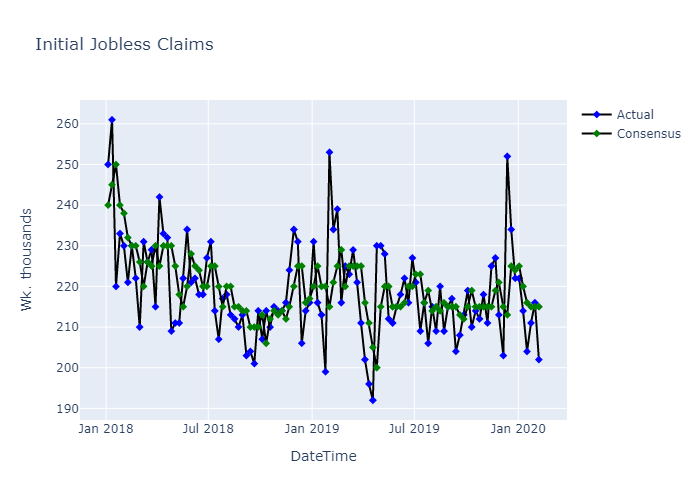

(None, None)

In [6]:
vs.plotly_graph2(data_raw['DateTime'], data_raw['Actual'], data_raw['Consensus'], data_raw.columns[1],
data_raw.columns[2], data_raw.columns[0], "Wk. thousands", "Initial Jobless Claims")

It can be assumed that Beat and Missed targets should be detected by calculating the difference between Actual and Consensus.

In [7]:
data_raw['Diff']=data_raw['Actual']-data_raw['Consensus']
data_raw.head()

DateTime  Actual  Consensus  Previous  Diff
0 2020-02-06 13:30:00   202.0      215.0     216.0 -13.0
1 2020-01-30 13:30:00   216.0      215.0     211.0   1.0
2 2020-01-23 13:30:00   211.0      215.0     204.0  -4.0
3 2020-01-16 13:30:00   204.0      216.0     214.0 -12.0
4 2020-01-09 13:30:00   214.0      220.0     222.0  -6.0

In [8]:
help(vs.plotly_graph1)

Help on function plotly_graph1 in module visualizations:

plotly_graph1(x, y, name, x_label, y_label, title)
    Function that plots a one-trace line+marker graph with plotly for time-series 
    reports Differences between Actual and Consensus in weekly statements.
    
        Parameters
        ----------
        x: Datetime values should be set as index for plotly chart. 
        y: Values of reports results Difference (Actual-Consensus) in df cols. 
        name: Label of y trace (str). 
        x_label: xlabel for plot (str). 
        y_label: y_label for plot (str).          
        title: Title of the plot (str). 
        Returns
        -------
        Returns 1 trace equal to y = difference (A-C) showing if forecasts are Beaten or Missed.



+ <font color= green> <font size = 2> **Beat** <font color= lightgray> *(Actual<Consensus):* Economic Growth expected.

+ <font color= red> <font size = 2> **Miss** <font color= lightgray> *(Actual>Consensus)*: Economic Decline expected.

This indicator shouldn't be taken lightly as it can be identified rather quickly how Initial Jobless Claims indicator seems to sound the alarm before economic declines. <br />
In this 2-year sample it can be quickly noticed that the biggest difference and greater miss from estimates was in Dic 2019. <br />
On Thursday's report, official data showed that 39,000 more americans than expected, filed for unemployment insurance for the *first time* during the previous week. <br />

Just a few months later, Covid crisis made itself clear for the American economy and sooner or later, for the rest of the world.

<font color= lightblue> <font size = 3> Validations </font>

*Note:* In order to convert New York timezone (EST) to GMT (MetaTrader5), validations from reports are analyzed at 14:30pm GMT for charts.

<font color= lightgray> The Jobless Claims targets that were <font color= red> missed <font color= lightgray > by the most, were registered on the following dates:

In [9]:
data_raw.sort_values('Diff').tail(10)

DateTime  Actual  Consensus  Previous  Diff
52  2019-02-07 13:30:00   234.0      221.0     253.0  13.0
89  2018-05-24 12:30:00   234.0      220.0     222.0  14.0
51  2019-02-14 13:30:00   239.0      225.0     234.0  14.0
62  2018-11-29 13:30:00   234.0      220.0     224.0  14.0
40  2019-05-02 12:30:00   230.0      215.0     230.0  15.0
108 2018-01-11 13:30:00   261.0      245.0     250.0  16.0
96  2018-04-05 12:30:00   242.0      225.0     215.0  17.0
41  2019-04-25 12:30:00   230.0      200.0     192.0  30.0
53  2019-01-31 13:30:00   253.0      215.0     199.0  38.0
8   2019-12-12 13:30:00   252.0      213.0     203.0  39.0

As actual values for **Initial Jobless Claims** were *higher than expected* because the target was missed, unemployment increased and the US economy was shrinking. <br /> The economic consequences are many, one of them can be seen in the short term in exchange rates.  <br /> In this project, EURUSD is going to be analyzed:  <br />
+ The Euro will appreciate and the USD will depreciate. This should be observed as <font color= green> EURUSD increases.


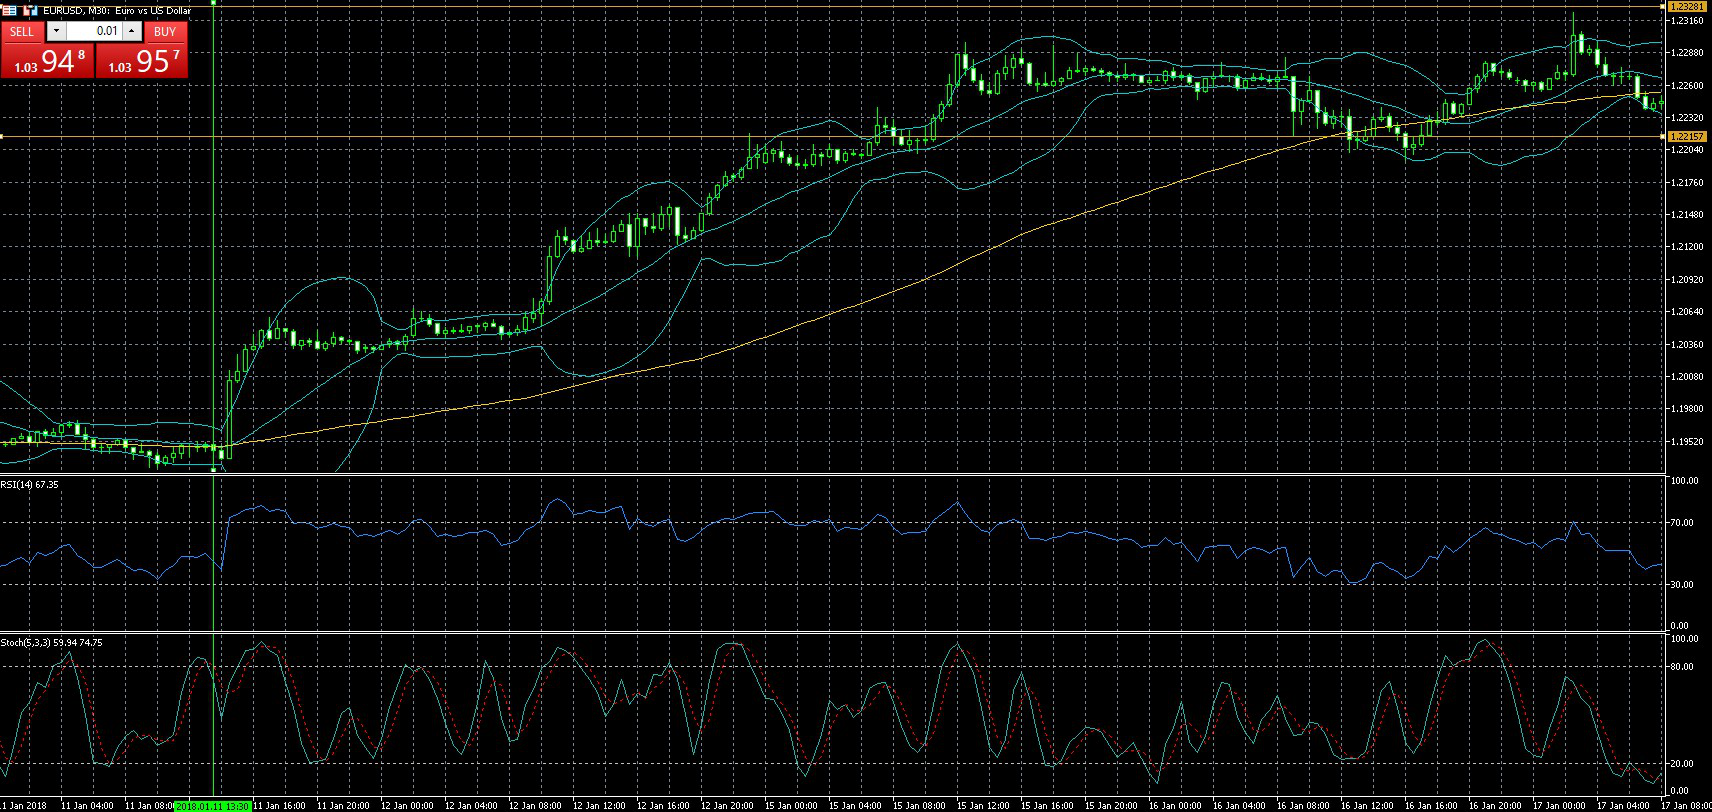

In [10]:
Miss1 = Image.open('Miss1.jpg')
Miss1

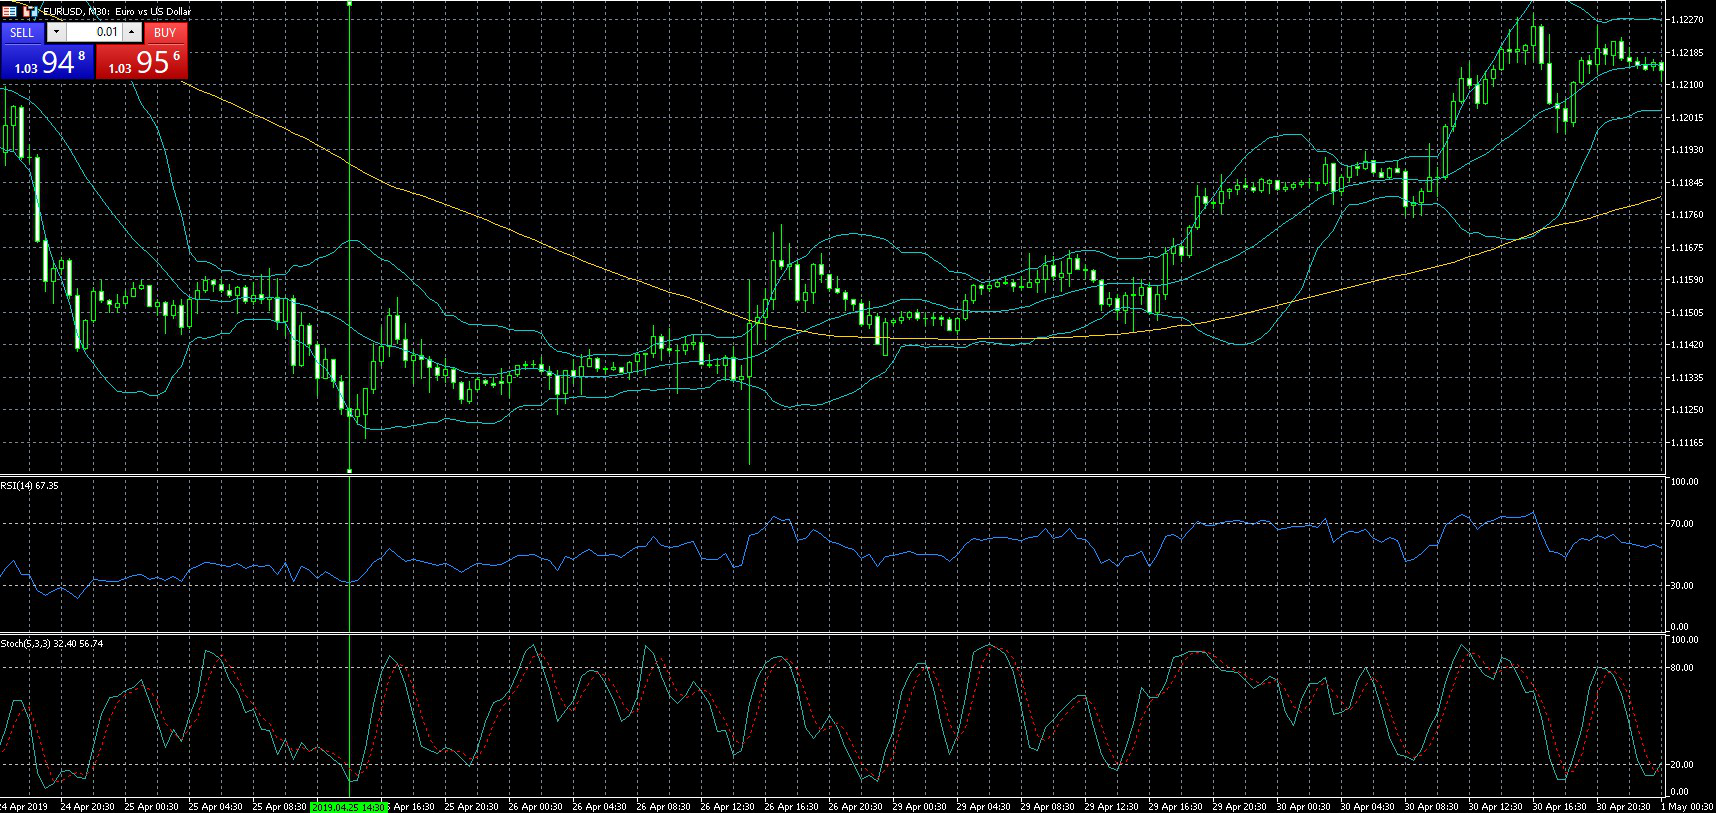

In [11]:
Miss2 = Image.open('Miss2.jpg')
Miss2

<font color= lightgray> The Jobless Claims targets that were beaten by the most, were registered on the following dates:

In [12]:
data_raw.sort_values('Diff').head(10)

DateTime  Actual  Consensus  Previous  Diff
107 2018-01-18 13:30:00   220.0      250.0     261.0 -30.0
54  2019-01-24 13:30:00   199.0      220.0     213.0 -21.0
93  2018-04-26 12:30:00   209.0      230.0     232.0 -21.0
60  2018-12-13 13:30:00   206.0      225.0     231.0 -19.0
101 2018-03-01 13:30:00   210.0      226.0     222.0 -16.0
97  2018-03-29 12:30:00   215.0      230.0     229.0 -15.0
43  2019-04-11 12:30:00   196.0      211.0     202.0 -15.0
92  2018-05-03 12:30:00   211.0      225.0     209.0 -14.0
45  2019-03-28 12:30:00   211.0      225.0     221.0 -14.0
44  2019-04-04 12:30:00   202.0      216.0     211.0 -14.0

With *lower Jobless Claims than expected*, Employment increases and the US economy has more growth than expected. <br /> 

+ The USD will appreciate and the Euro will depreciate. This should be observed as EURUSD exchange rates <font color= red> decrease. <br />

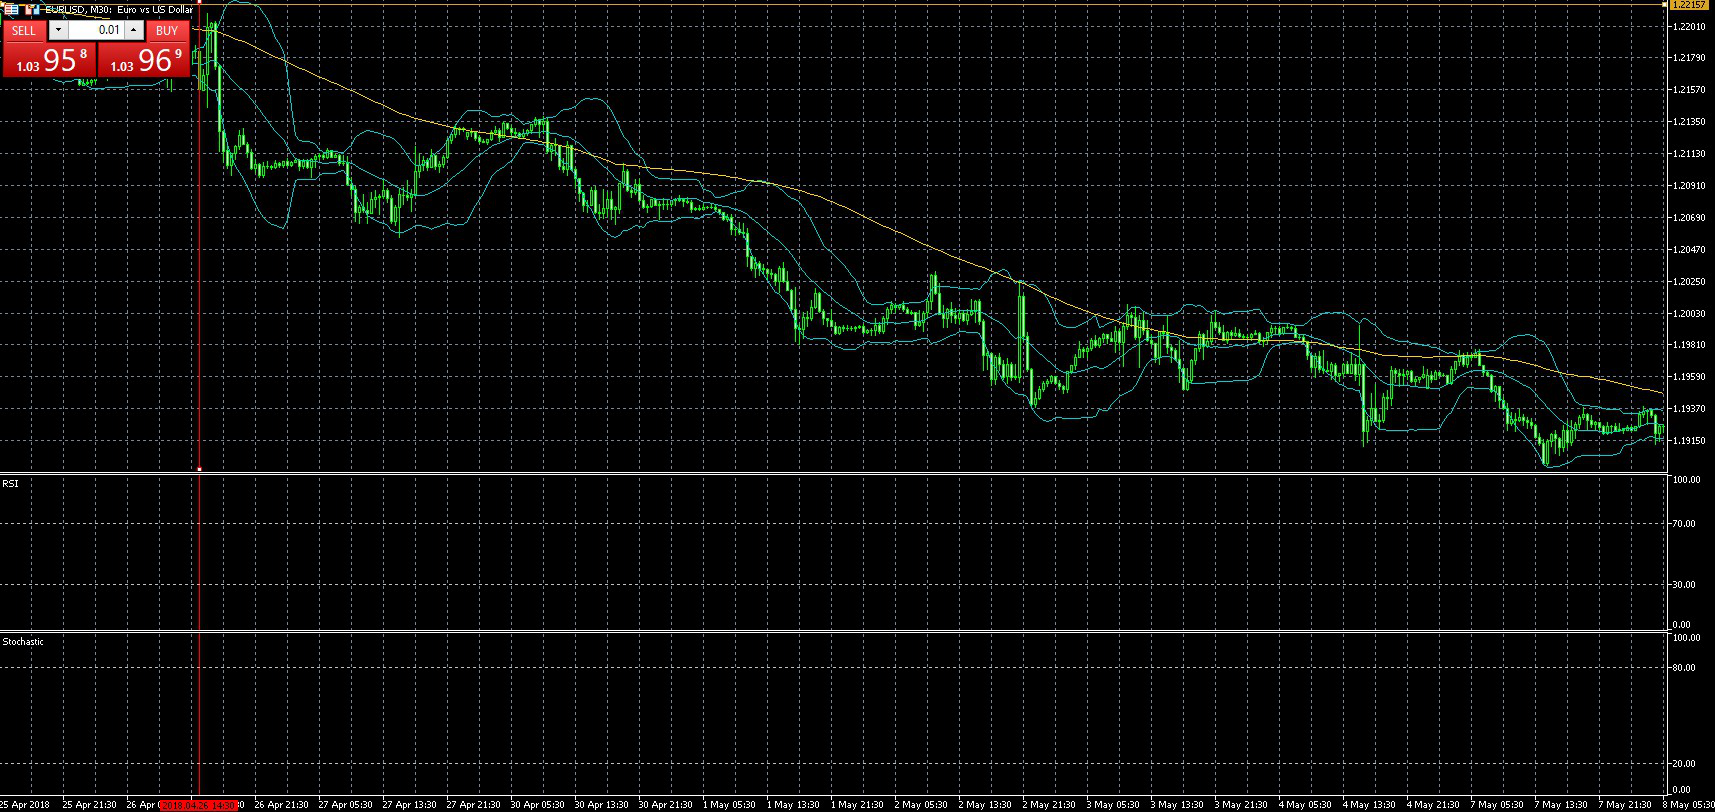

In [13]:
Beat1 = Image.open('Beat1.jpg')
Beat1

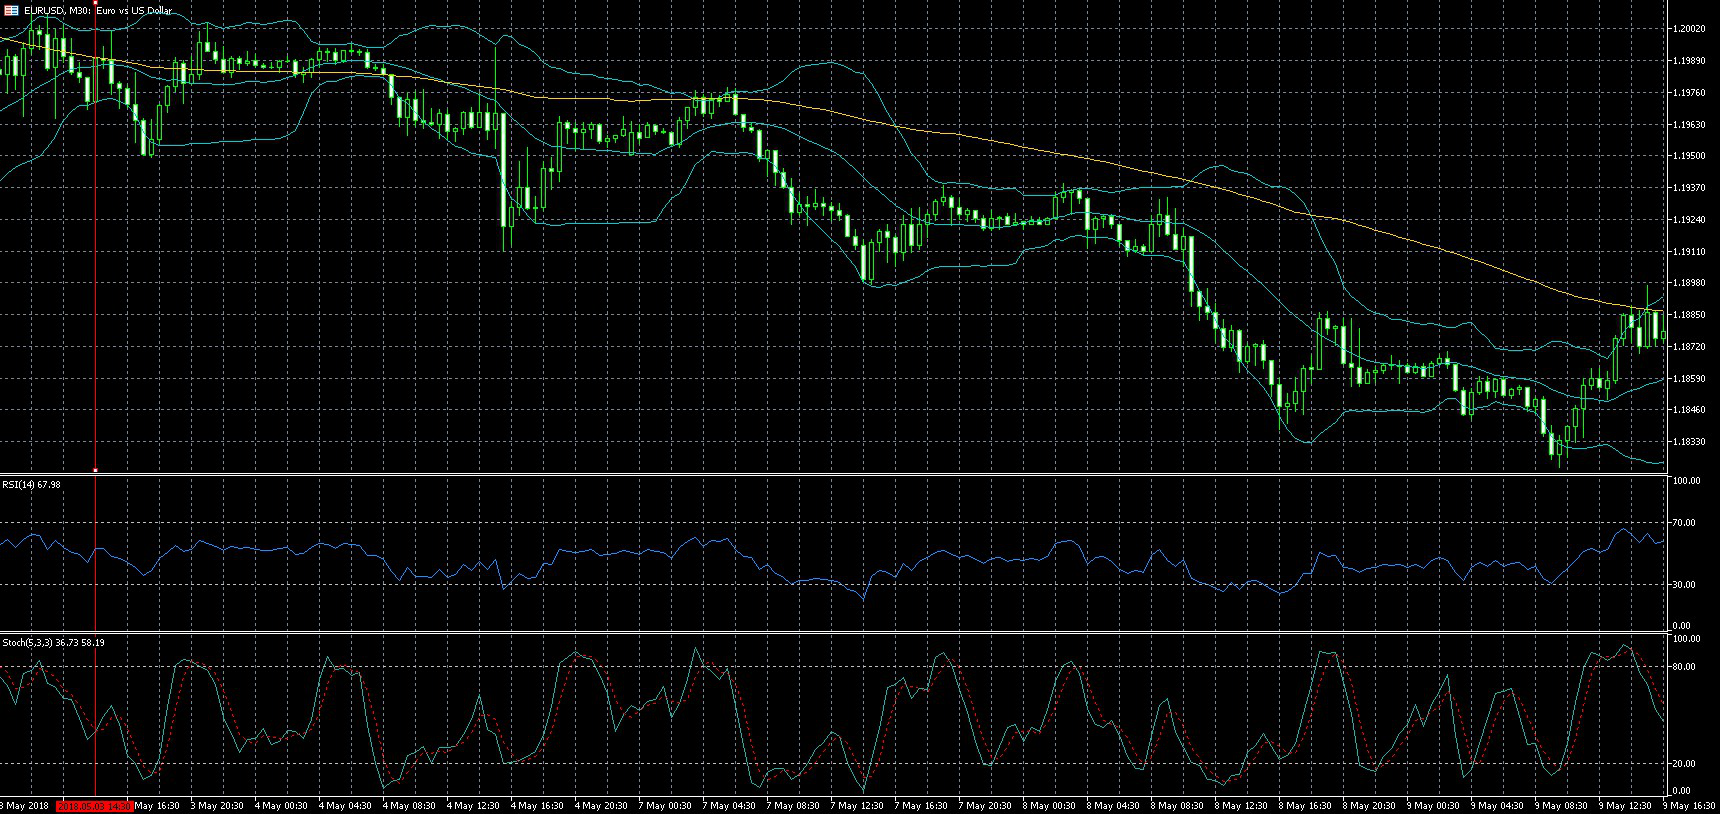

In [14]:
Beat2 = Image.open('Beat2.jpg')
Beat2

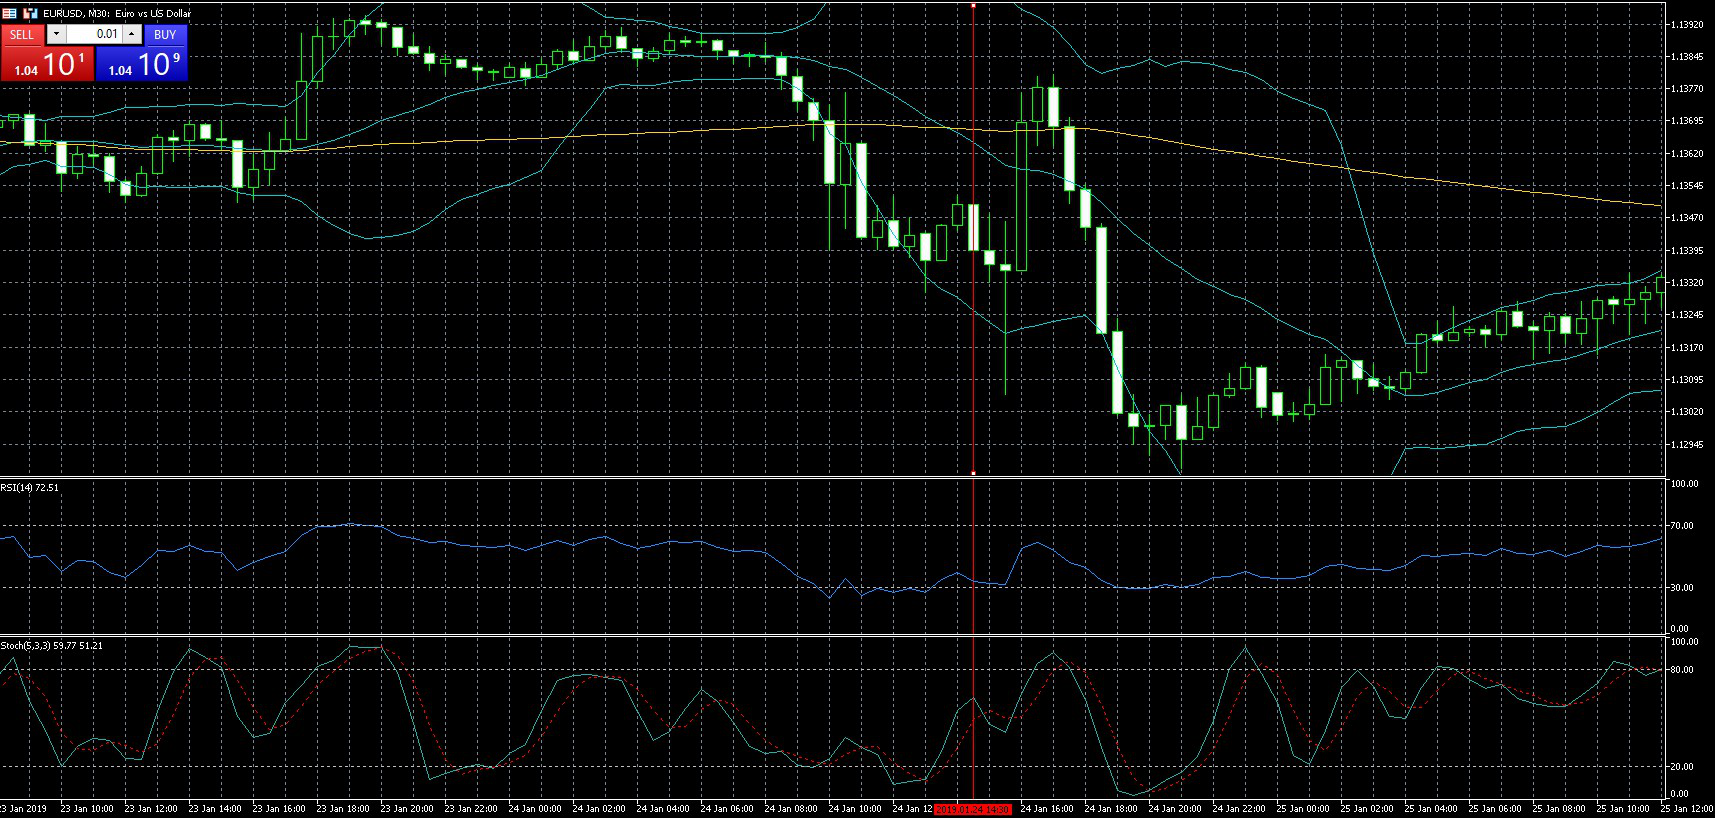

In [15]:
Beat3 = Image.open('Beat3.jpg')
Beat3

The candle chart of EURUSD is plotted on a Daily timeframe to illustrate how short term consequences of Initial Jobless Claims reports are immediate but they aren't meant to be long lasting if the Euro declines as well.

In [16]:
help(dt.fx_rate)

Help on function fx_rate in module data:

fx_rate(pairs, account, pw, timeframe)
    Function that downloads exchange rates data for given timeframes with MetaTrader 5 api.
    
    Parameters
    ----------
    + pairs: Exchange Rate Currencies (ej. USDMXN, EURUSD)
    + account: Valid Mt5 username credential. (64225494)
    + pw: Valid Mt5 password credential. (movz2vvi)
    + timeframe: Data download temporality: 10M, 30M, H1, H4, D1 (str). 
    -------
    Returns: Returns OHCLV, spreads and Real Volume for selected timeframes (dataframe).



EURUSD exchange rates are downloaded from MT5 with the function above:

In [17]:
pairs, account, pw, timeframe = 'EURUSD', 64225494, 'movz2vvi', '30M'
EURUSD = dt.fx_rate(pairs, account, pw, timeframe)
EURUSD.head()

time     open     high      low    close  tick_volume  \
0 2018-01-02 00:00:00  1.20088  1.20094  1.20007  1.20058          107   
1 2018-01-02 00:30:00  1.20058  1.20153  1.20058  1.20135          292   
2 2018-01-02 01:00:00  1.20118  1.20145  1.20045  1.20129         1044   
3 2018-01-02 01:30:00  1.20130  1.20143  1.20087  1.20098          630   
4 2018-01-02 02:00:00  1.20087  1.20159  1.20083  1.20137          277   

   spread  real_volume  
0      18            0  
1      18            0  
2      18            0  
3      18            0  
4      16            0

In [18]:
help(vs.OHCLV_csticks)

Help on function OHCLV_csticks in module visualizations:

OHCLV_csticks(fx_rates, title_1, title_2, n)
    Function that plots candlesticks, BB and MA for the given stock/forex with given temporality in dataframe (fx_rates).
    
        Parameters
        ----------
        fx_rates: fx_rates with OHLCV (dataframe).
        title_1: Upper subplot title (str). 
        title_2: Lower subplot title (str).
        n: MA & Std. ~ Window (default = 30)
    
        Returns
        -------
        Returns candlesticks time-series with Moving Average (n ~ window), Bollinger Bands (n ~ Window) and Volumes.



In [19]:
data_raw.sort_values('Diff').tail(1)

DateTime  Actual  Consensus  Previous  Diff
8 2019-12-12 13:30:00   252.0      213.0     203.0  39.0

To illustrate the **highest missed** target: <br />
In 2019-12-12 the EURUSD closed at 1.09748. <br />

Immediate effects caused the **EURUSD** to **rise** and by Jan 8 price levels of 1.11 were being observed. <br />
They weren't meant to be long lasting as by Febraury 3 *(2 months later)* it started to fall abruptly. <br />


+ *Technical Analysis show how by the end of the sample the EURUSD recovered by more than just a correction <br />
but powered as well by an upward trend because the SMA ~ 30 (d) resistance was broke.  <br /> 
This pointed to a recovery for the Euro against the dollar which did in fact occur, it lasted for more than a year.*

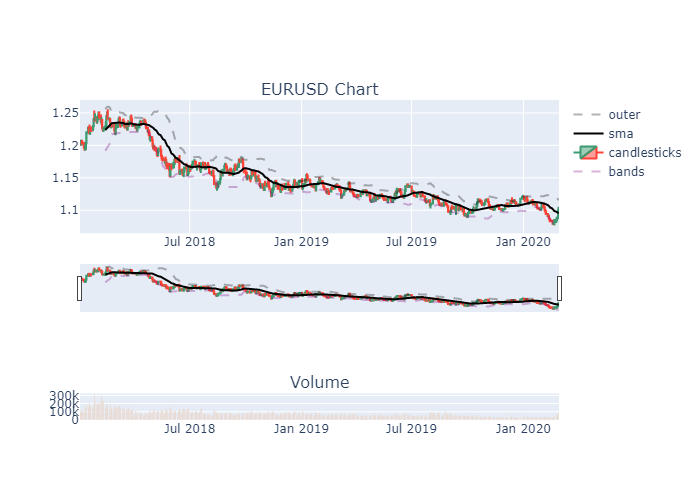

(None, None)

In [20]:
EURUSD_D = dt.fx_rate(pairs, account, pw, 'D1')
vs.OHCLV_csticks(EURUSD_D, 'EURUSD Chart', 'Volume', 30)

<font color= orange> <font size = 5> 2. Statistical aspects </font> 

<font color= lightblue> <font size = 3> 1. Component of Autocorrelation and Partial Autocorrelation. </font> <br />

In [21]:
help(vs.create_corr_plot)

Help on function create_corr_plot in module visualizations:

create_corr_plot(index, plot_pacf=False)
    Function that graphs lines+marker AutoCorrelation and Partial AutoCorrelation 
    plot intended to model economic index Actual values.
    
        Parameters
        ----------
        index: Actual values from economic index (col) 
    
        Returns
        -------
        lines+marker AutoCorrelation and Partial AutoCorrelation 
        plots in a didactic graph with plotly.



From the next acf and pacf plots it can be concluded that there is a strong correlation at lag = 1 from Actual values.

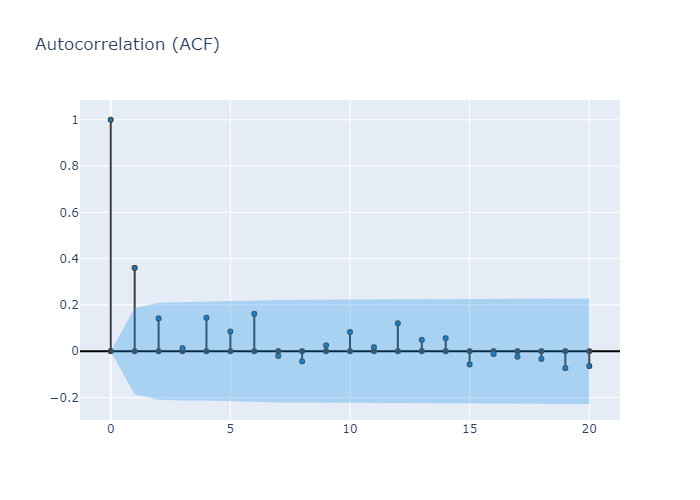

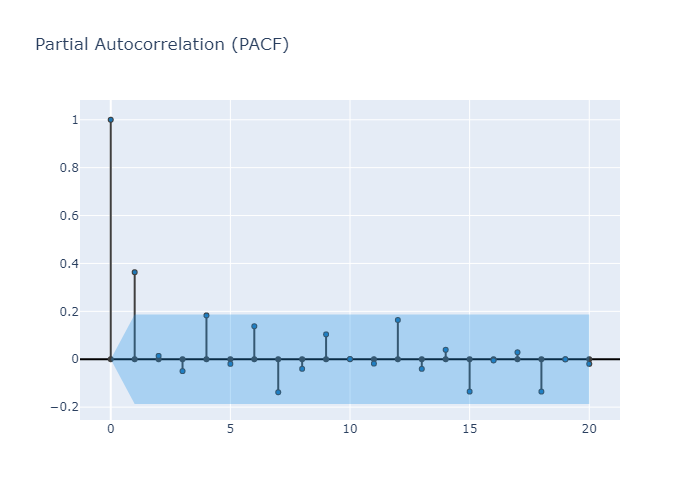

In [22]:
vs.create_corr_plot(data_raw.Actual, plot_pacf=False),
vs.create_corr_plot(data_raw.Actual, plot_pacf=True)


<font color= lightblue> <font size = 3> 2. Heteroscedasticity test. </font> <br />

The QQ plot shows that index data Actual values, do not form a straight line with its quantiles. <br /> 
Therefore, it can't be concluded that samples come from the same distribution.

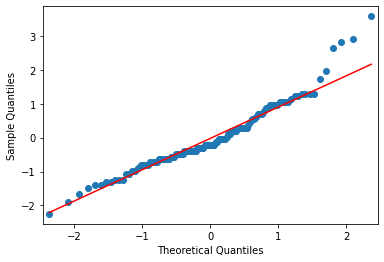

In [23]:
vs.qq(data_raw.Actual)

<font color= lightblue> <font size = 3> 3. Normality test. </font> <br />

Suplementary to graphical assestment of normality. <br /> 
The p-value is less than .05 in the Kolmogorov-Smirnov test, therefore we can reject the null hypothesis. <br /> 
There's enough evidence to say Actual values don't come from a normal distribution.

In [24]:
kstest(data_raw.Actual, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

<font color= lightblue> <font size = 3> 4. Stationarity and Seasonality </font> <br />

The p-value obtained is lower than significance level of 0.05 so we can reject the null hypothesis and assume stationarity in the time-series.

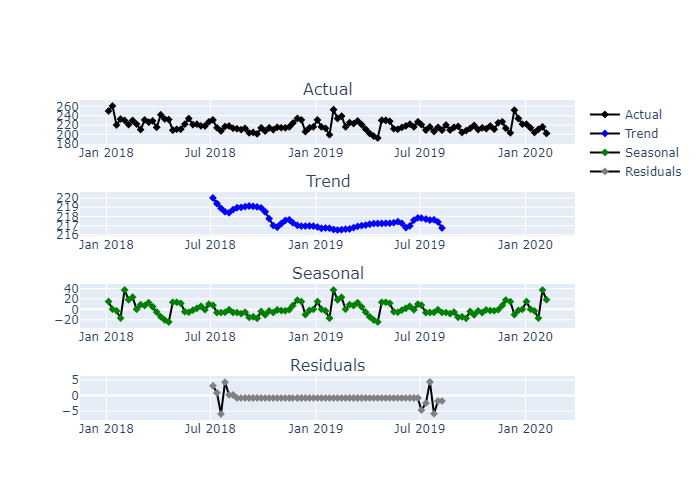

('p-value:', 0.027928715879526382)

In [25]:
vs.Stationarity(data_raw['DateTime'], data_raw['Actual'], 52)

<font color= lightblue> <font size = 3> 6. Atypical Detection. </font> <br />

It can be observed from Actual Values that there are several outliers on the upside which just points to major unemployment on rare circumstances.

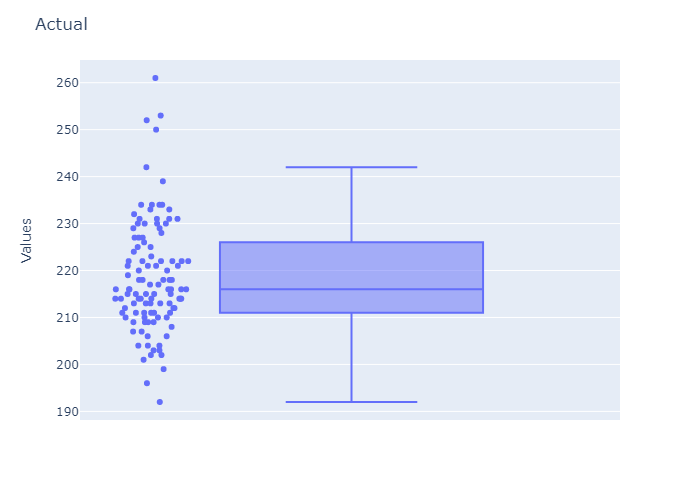

(None, None)

In [26]:
vs.Box(data_raw, data_raw['Actual'], "Actual")

<font color= orange> <font size = 5> 3. Computational Aspects </font>

We are going to classify case scenarios for Actual values in relation to Consensus estimates and Previous report values as well. <br /> This will help us determine the type of operation that should be made, given the case. <br />

In [27]:
Cases = pd.DataFrame({'Cases':['A', 'B', 'C', 'D'],
'Assignation': ['Actual >= Consensus >= Previous',
'Actual >= Consensus < Previous ',
'Actual < Consensus >= Previous',
'Actual <= Consensus >= Previous']})

Cases

Cases                      Assignation
0     A  Actual >= Consensus >= Previous
1     B  Actual >= Consensus < Previous 
2     C   Actual < Consensus >= Previous
3     D  Actual <= Consensus >= Previous

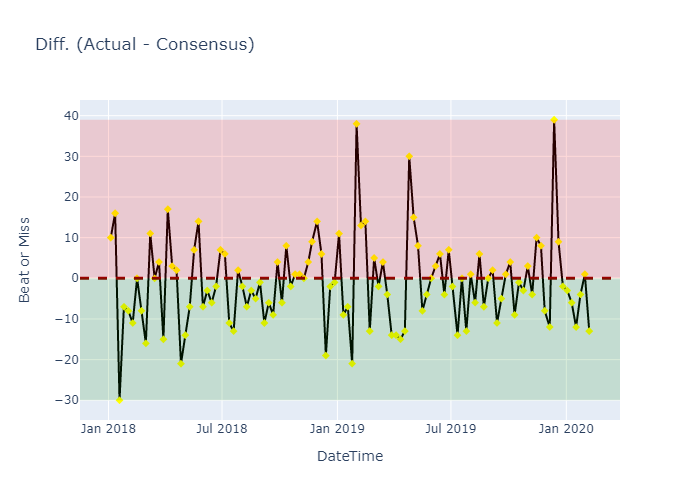

(None, None)

In [28]:
vs.plotly_graph1(data_raw['DateTime'], data_raw['Diff'], data_raw.columns[4], data_raw.columns[0], "Beat or Miss", 'Diff. (Actual - Consensus)')

As it was stated on Cases dataframe: <br /> 
<font color= red> <font size = 2> **Missed Targets** <font color= white> make the least favourable scenarios **A, B**. <br />
The corresponding response in **EURUSD** is to <font color= green> **Buy** <font color= white> = <font color= red> The USD depreciates.

<font color= green> <font size = 2> **Beats** <font color= white> make the most favourable scenarios **C, D**. <br />
The corresponding response in **EURUSD** is to <font color= red> **Sell** <font color= white> = <font color= green> The USD appreciates.

In [29]:
cases=fn.case_operation(data_raw)
cases.sort_values('Diff').head(10)

DateTime  Actual  Consensus  Previous  Diff Case EURUSD
107 2018-01-18 13:30:00   220.0      250.0     261.0 -30.0    D   Sell
54  2019-01-24 13:30:00   199.0      220.0     213.0 -21.0    C   Sell
93  2018-04-26 12:30:00   209.0      230.0     232.0 -21.0    D   Sell
60  2018-12-13 13:30:00   206.0      225.0     231.0 -19.0    D   Sell
101 2018-03-01 13:30:00   210.0      226.0     222.0 -16.0    C   Sell
97  2018-03-29 12:30:00   215.0      230.0     229.0 -15.0    C   Sell
43  2019-04-11 12:30:00   196.0      211.0     202.0 -15.0    C   Sell
92  2018-05-03 12:30:00   211.0      225.0     209.0 -14.0    C   Sell
45  2019-03-28 12:30:00   211.0      225.0     221.0 -14.0    C   Sell
44  2019-04-04 12:30:00   202.0      216.0     211.0 -14.0    C   Sell

In [30]:
cases.sort_values('Diff').tail(10)

DateTime  Actual  Consensus  Previous  Diff Case EURUSD
52  2019-02-07 13:30:00   234.0      221.0     253.0  13.0    B    Buy
89  2018-05-24 12:30:00   234.0      220.0     222.0  14.0    B    Buy
51  2019-02-14 13:30:00   239.0      225.0     234.0  14.0    B    Buy
62  2018-11-29 13:30:00   234.0      220.0     224.0  14.0    B    Buy
40  2019-05-02 12:30:00   230.0      215.0     230.0  15.0    B    Buy
108 2018-01-11 13:30:00   261.0      245.0     250.0  16.0    B    Buy
96  2018-04-05 12:30:00   242.0      225.0     215.0  17.0    A    Buy
41  2019-04-25 12:30:00   230.0      200.0     192.0  30.0    A    Buy
53  2019-01-31 13:30:00   253.0      215.0     199.0  38.0    A    Buy
8   2019-12-12 13:30:00   252.0      213.0     203.0  39.0    A    Buy

Resulting Case Scenarios are illustrated in the following histogram:

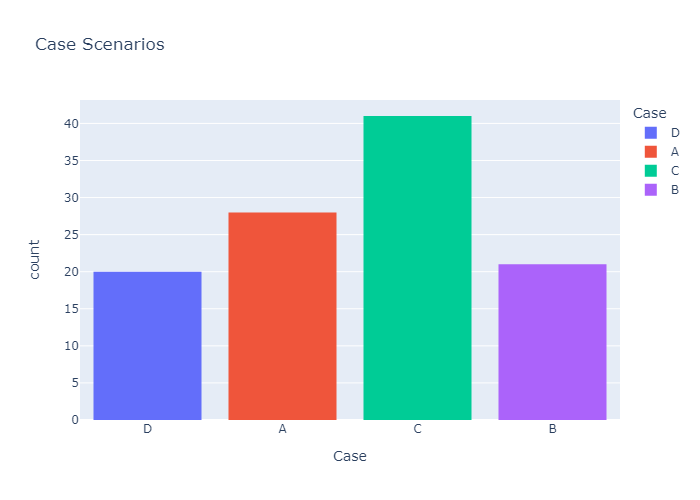

Counter
EURUSD         
Sell         61
Buy          49

In [31]:
vs.indicator_scenarios(cases, 'Case Scenarios')

### <font color= orange> <font size = 5> 4. Backtest and Optimization: </font>

In [32]:
pairs, account, pw, timeframe = 'EURUSD', 64225494, 'movz2vvi', '30M'
DateTime, Actual, Consensus, Previous, Case, Direction, pip_up, pip_down, volatility = ([] for i in range(9))
EURUSD = dt.fx_rate(pairs, account, pw, timeframe) 

In [34]:
df_escenarios = fn.Optimization(cases, EURUSD)
df_escenarios.head(10)


DateTime Case  Direction  pip_up  pip_down   volatility
0 2018-01-04 13:30:00    B          1    58.0      47.0         13.0
1 2018-01-11 13:30:00    B          1    91.0      88.0          1.0
2 2018-01-18 13:30:00    D         -1    34.0      23.0          9.0
3 2018-01-25 13:30:00    C         -1    26.0      30.0          7.0
4 2018-02-01 13:30:00    C         -1    85.0      81.0          0.0
5 2018-02-08 13:30:00    C         -1    14.0      12.0          3.0
6 2018-02-15 13:30:00    A          1    66.0      86.0          3.0
7 2018-02-22 13:30:00    C         -1    27.0      18.0          3.0
8 2018-03-01 13:30:00    C         -1    71.0      76.0          2.0
9 2018-03-08 13:30:00    A          1   108.0      97.0          2.0

In [35]:
df_escenarios.tail(10)

DateTime Case  Direction  pip_up  pip_down   volatility
100 2019-12-05 13:30:00    C         -1    29.0      29.0          2.0
101 2019-12-12 13:30:00    A          1    40.0      37.0          1.0
102 2019-12-19 13:30:00    B          1     4.0       1.0          1.0
103 2019-12-26 13:30:00    D         -1    39.0      43.0          0.0
104 2020-01-02 13:30:00    C         -1    62.0      58.0          3.0
105 2020-01-09 13:30:00    D         -1     8.0       3.0          0.0
106 2020-01-16 13:30:00    C         -1    11.0      12.0          1.0
107 2020-01-23 13:30:00    C         -1    40.0      37.0          2.0
108 2020-01-30 13:30:00    A          1    22.0      16.0          3.0
109 2020-02-06 13:30:00    D         -1    14.0      15.0          2.0

In [36]:
train, test = train_test_split(df_escenarios, test_size=0.5)
train = train.sort_values('DateTime')
test = test.sort_values('DateTime')

### <font color= orange> <font size = 5> 5. Bibliography: </font>

<font color= lightgray>

+ Villalobos, O, 2021. *Python Project Template*. Available at: https://github.com/OmarVillalobos/python-project. 

+ ETA, (2022). *United States Department of Labor*. Available at: https://www.dol.gov/agencies/eta 
(Accessed: November 21, 2022). 

